In [1]:
import math

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Bianchi IX visualisations**

In [2]:
# sns.set(rc={'axes.facecolor': 'white'})

In [27]:
df_bIX_upside = pd.read_csv('bianchiIX_isotropic_eta_0.018000_omega_2_0.000010_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside.columns = ['x', 'a', 'da', 'phi']
df_bIX_upside['da/a'] = df_bIX_upside['da'] / df_bIX_upside['a']
df_bIX_upside['x'] = df_bIX_upside['x'] + 3.2878
df_bIX_upside 

,x,a,da,phi,da/a
0,0.00000,0.000735,0.000006,32.77640,0.008078
1,0.00329,0.000735,0.000021,30.26370,0.028372
2,0.00658,0.000735,0.000036,29.18430,0.048662
3,0.00986,0.000735,0.000051,28.48690,0.068945
4,0.01315,0.000735,0.000066,27.97050,0.089220
...,...,...,...,...,...
1996,25.59820,4.337880,0.073583,-5.09925,0.016963
1997,25.62060,4.339530,0.073546,-5.10039,0.016948
1998,25.64300,4.341180,0.073510,-5.10153,0.016933
1999,25.66540,4.342820,0.073473,-5.10267,0.016918


<Axes: xlabel='x', ylabel='da/a'>

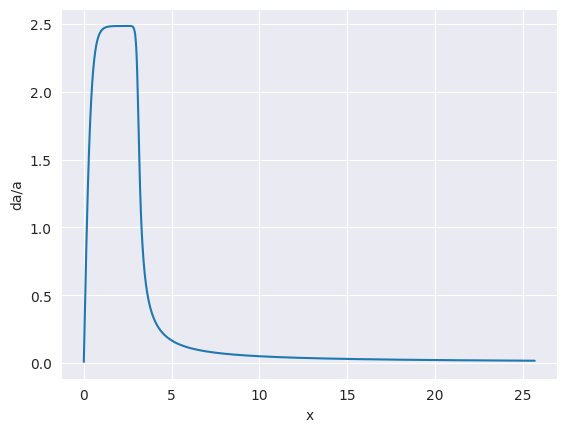

In [28]:
sns.lineplot(df_bIX_upside, x='x', y='da/a')

In [29]:
df_bIX_downside = pd.read_csv('bianchiIX_isotropic_eta_0.018000_omega_2_0.000010_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside.columns = ['x', 'a', 'da', 'phi']
df_bIX_downside['da/a'] = df_bIX_downside['da'] / df_bIX_downside['a']
df_bIX_downside['x'] = df_bIX_downside['x'] - 3.2878

<Axes: xlabel='x', ylabel='da/a'>

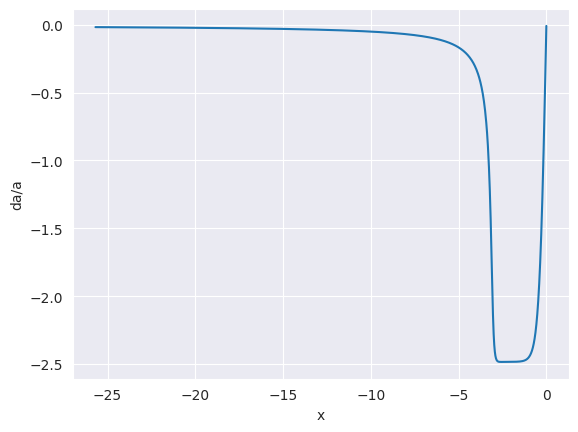

In [30]:
sns.lineplot(df_bIX_downside, x='x', y='da/a')

In [31]:
df_bIX_merged = pd.concat([df_bIX_downside, df_bIX_upside], axis=0).dropna()
df_bIX_merged

,x,a,da,phi,da/a
0,-25.6878,-4.34447,0.073437,-5.10381,-0.016903
1,-25.6654,-4.34282,0.073473,-5.10267,-0.016918
2,-25.6430,-4.34118,0.073510,-5.10153,-0.016933
3,-25.6206,-4.33953,0.073546,-5.10039,-0.016948
4,-25.5982,-4.33788,0.073583,-5.09925,-0.016963
...,...,...,...,...,...
1996,25.5982,4.33788,0.073583,-5.09925,0.016963
1997,25.6206,4.33953,0.073546,-5.10039,0.016948
1998,25.6430,4.34118,0.073510,-5.10153,0.016933
1999,25.6654,4.34282,0.073473,-5.10267,0.016918


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

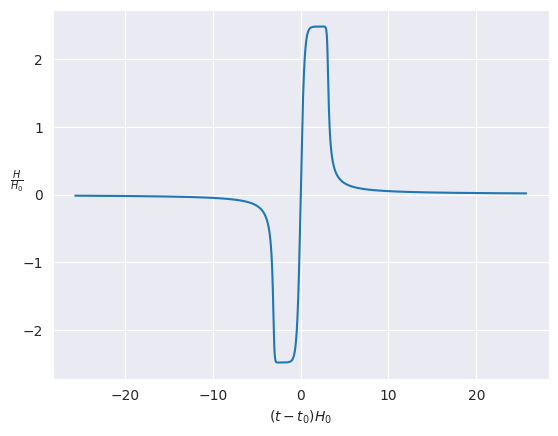

In [32]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged, x='x', y='da/a', ax=ax)


[(0.0, 4.6), (0.8, 1.05)]

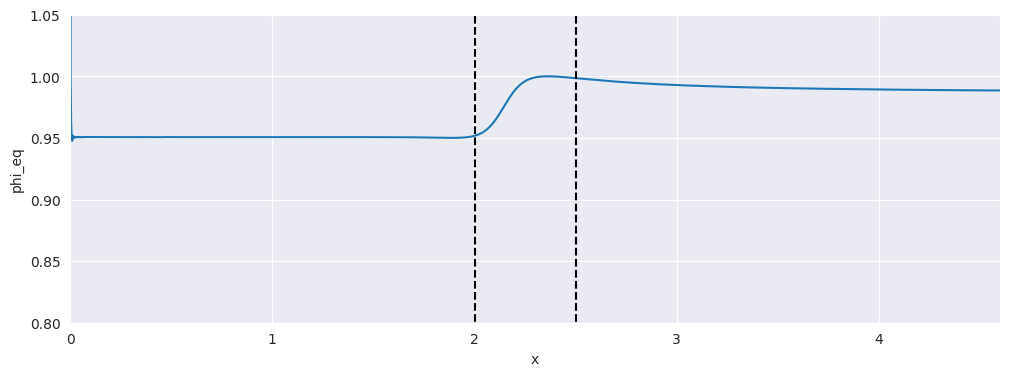

In [9]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([2, 2], [0, 1.05], color='k', linestyle='--')
ax.plot([2.5, 2.5], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 4.6), ylim=(0.8, 1.05))
# dphi0, const

[(0.0, 0.05), (0.8, 1.05)]

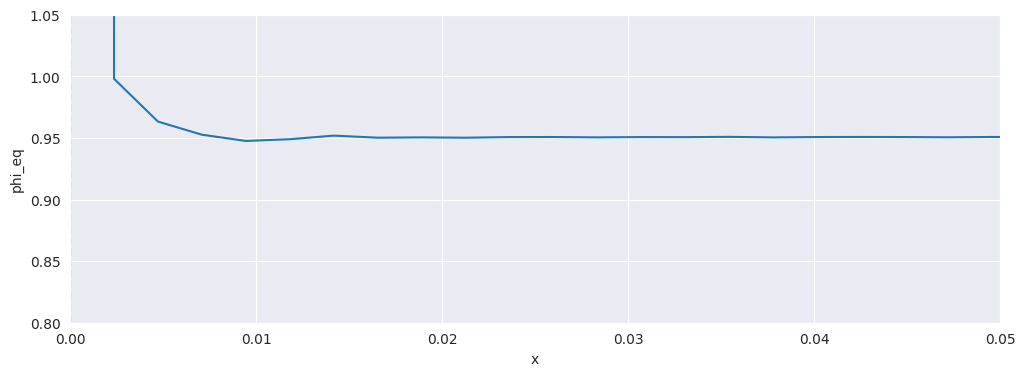

In [10]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
_, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([-0.5, -0.5], [0, 1.05], color='k', linestyle='--')
ax.plot([0.0, 0.0], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 0.05), ylim=(0.8, 1.05))
# dphi0, const

## eta=18.0*1e-3, Omega_2 = 1.0e-5, dbp=dbm=1.0e-3, bp=bm=1.0e-7

In [42]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_dbp_0.001000_dbm_0.001000_3000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 3.42122

In [43]:
df_bIX_upside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,0.00000,0.000734,0.000003,33.9207,0.000364,0.000305,-0.009571,-0.008926,0.004704
1,0.00114,0.000734,0.000009,32.0909,0.000908,0.000761,-0.009570,-0.008925,0.011743
2,0.00228,0.000734,0.000014,31.1516,0.001451,0.001217,-0.009569,-0.008924,0.018781
3,0.00342,0.000734,0.000019,30.5150,0.001993,0.001672,-0.009567,-0.008922,0.025819
4,0.00456,0.000734,0.000024,30.0327,0.002534,0.002125,-0.009564,-0.008920,0.032854
...,...,...,...,...,...,...,...,...,...
5997,23.18512,0.000716,-0.000728,24.4351,0.453067,0.731180,0.056266,0.075354,-1.015704
5998,23.19172,0.000711,-0.000907,24.3851,0.601763,0.978068,0.059685,0.080893,-1.275233
5999,23.19832,0.000704,-0.001382,24.2222,0.976223,1.596510,0.064658,0.089004,-1.963138
6000,23.20492,0.000686,-0.016387,23.0242,12.424700,20.404200,0.077457,0.109996,-23.874439


<Axes: xlabel='x', ylabel='da/a'>

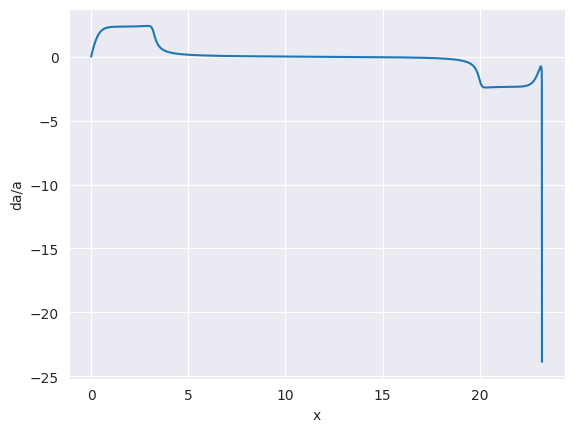

In [44]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [45]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_dbp_0.001000_dbm_0.001000_3000p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 3.42122

In [46]:
df_bIX_downside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-23.20492,0.000727,0.000196,26.0971,0.123786,0.040421,-0.051109,-0.034388,0.269661
1,-23.20492,0.000727,0.000196,26.0971,0.123786,0.040421,-0.051109,-0.034388,0.269661
2,-23.19832,0.000728,0.000222,25.8203,0.134360,0.045576,-0.050257,-0.034104,0.305122
3,-23.19172,0.000730,0.000248,25.5740,0.143303,0.050516,-0.049340,-0.033787,0.340053
4,-23.18512,0.000732,0.000274,25.3517,0.150738,0.055221,-0.048370,-0.033438,0.374539
...,...,...,...,...,...,...,...,...,...
5997,-0.00456,0.000734,-0.000025,29.9563,0.002645,0.003072,0.009577,0.010223,-0.034209
5998,-0.00342,0.000734,-0.000020,30.4170,0.002103,0.002443,0.009580,0.010226,-0.027174
5999,-0.00228,0.000734,-0.000015,31.0166,0.001560,0.001812,0.009582,0.010228,-0.020138
6000,-0.00114,0.000734,-0.000010,31.8768,0.001015,0.001179,0.009583,0.010230,-0.013099


<Axes: xlabel='x', ylabel='da/a'>

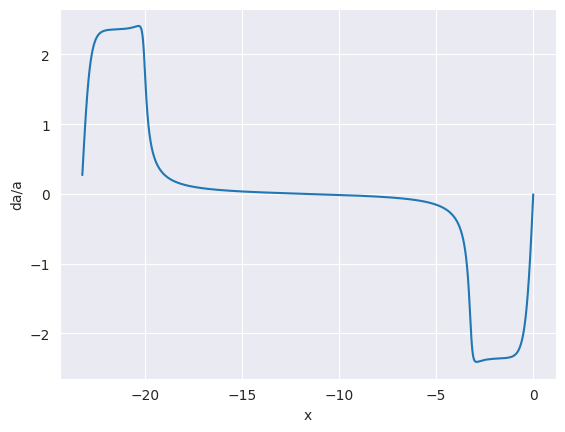

In [47]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [48]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a.reset_index(drop=True, inplace=True)
df_bIX_merged_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-23.20492,0.000727,0.000196,26.0971,0.123786,0.040421,-0.051109,-0.034388,0.269661
1,-23.20492,0.000727,0.000196,26.0971,0.123786,0.040421,-0.051109,-0.034388,0.269661
2,-23.19832,0.000728,0.000222,25.8203,0.134360,0.045576,-0.050257,-0.034104,0.305122
3,-23.19172,0.000730,0.000248,25.5740,0.143303,0.050516,-0.049340,-0.033787,0.340053
4,-23.18512,0.000732,0.000274,25.3517,0.150738,0.055221,-0.048370,-0.033438,0.374539
...,...,...,...,...,...,...,...,...,...
11999,23.18512,0.000716,-0.000728,24.4351,0.453067,0.731180,0.056266,0.075354,-1.015704
12000,23.19172,0.000711,-0.000907,24.3851,0.601763,0.978068,0.059685,0.080893,-1.275233
12001,23.19832,0.000704,-0.001382,24.2222,0.976223,1.596510,0.064658,0.089004,-1.963138
12002,23.20492,0.000686,-0.016387,23.0242,12.424700,20.404200,0.077457,0.109996,-23.874439


In [49]:
df_bIX_merged_a['dbp_squared'] = df_bIX_merged_a['dbp'] ** 2 
df_bIX_merged_a['dbm_squared'] = df_bIX_merged_a['dbm'] ** 2
df_bIX_merged_a['s_squared'] = df_bIX_merged_a['dbp_squared'] + df_bIX_merged_a['dbm_squared']
df_bIX_merged_a['s'] = df_bIX_merged_a['s_squared'].apply(lambda x: math.sqrt(x))
df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'] * 10

In [50]:
df_bIX_merged_a[(df_bIX_merged_a['x'] >= -0.01) & (df_bIX_merged_a['a'] >= 0)]

,x,a,da,phi,dbp,dbm,bp,bm,da/a,dbp_squared,dbm_squared,s_squared,s,s*1000
5993,-0.00912,0.000734,-0.000046,28.7550,0.004791,0.005560,0.009560,0.010203,-0.062327,0.000023,0.000031,0.000054,0.007340,0.073396
5994,-0.00798,0.000734,-0.000041,28.9946,0.004258,0.004943,0.009565,0.010209,-0.055302,0.000018,0.000024,0.000043,0.006525,0.065245
5995,-0.00684,0.000734,-0.000035,29.2668,0.003723,0.004323,0.009570,0.010214,-0.048274,0.000014,0.000019,0.000033,0.005705,0.057049
5996,-0.00570,0.000734,-0.000030,29.5820,0.003185,0.003699,0.009574,0.010219,-0.041243,0.000010,0.000014,0.000024,0.004881,0.048811
5997,-0.00456,0.000734,-0.000025,29.9563,0.002645,0.003072,0.009577,0.010223,-0.034209,0.000007,0.000009,0.000016,0.004054,0.040539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,23.18512,0.000716,-0.000728,24.4351,0.453067,0.731180,0.056266,0.075354,-1.015704,0.205270,0.534624,0.739894,0.860171,8.601709
12000,23.19172,0.000711,-0.000907,24.3851,0.601763,0.978068,0.059685,0.080893,-1.275233,0.362119,0.956617,1.318736,1.148362,11.483622
12001,23.19832,0.000704,-0.001382,24.2222,0.976223,1.596510,0.064658,0.089004,-1.963138,0.953011,2.548844,3.501856,1.871325,18.713245
12002,23.20492,0.000686,-0.016387,23.0242,12.424700,20.404200,0.077457,0.109996,-23.874439,154.373170,416.331378,570.704548,23.889423,238.894233


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

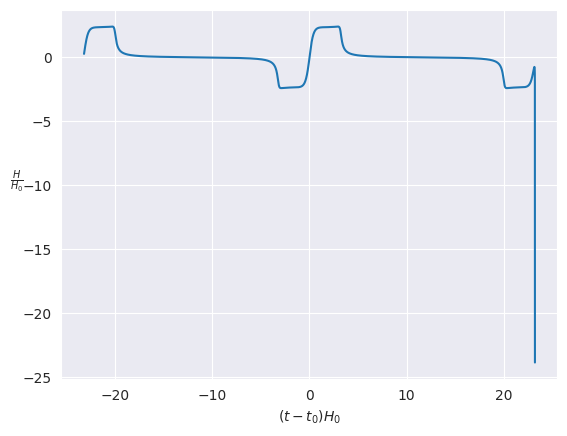

In [51]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
# sns.lineplot(df_bIX_merged_a, x='x', y='s*1000', ax=ax)

(-5.0, 5.0)

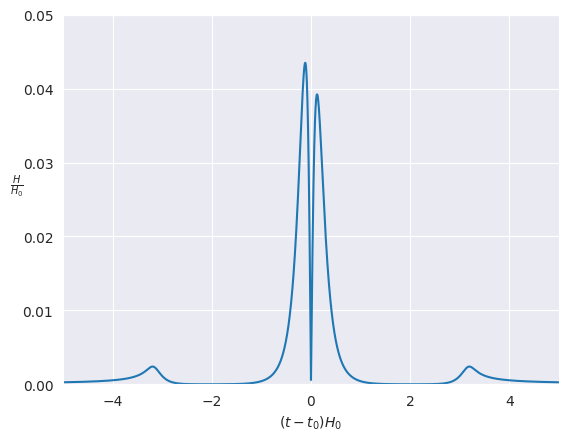

In [52]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)
plt.ylim([-0.000001, 0.05])
plt.xlim([-5, 5])

## eta=18.0*1e-3, Omega_2 = 1.0e-5, dbp=dbm=1.0e-7, bp=bm=1.0e-7

In [53]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_dbp_0.000000_dbm_0.000000_3000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 3.42122

In [54]:
df_bIX_upside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,0.00000,0.000735,1.759820e-09,57.6030,-3.354920e-12,-5.833330e-11,4.362430e-07,4.362440e-07,0.000002
1,0.00114,0.000735,5.164130e-06,33.1056,-2.456140e-08,-2.453380e-08,4.362290e-07,4.362300e-07,0.007027
2,0.00228,0.000735,1.033690e-05,31.7176,-4.909460e-08,-4.904840e-08,4.361870e-07,4.361880e-07,0.014067
3,0.00342,0.000735,1.550920e-05,30.9061,-7.359050e-08,-7.359320e-08,4.361170e-07,4.361180e-07,0.021105
4,0.00456,0.000735,2.068110e-05,30.3304,-9.803740e-08,-9.804620e-08,4.360190e-07,4.360200e-07,0.028142
...,...,...,...,...,...,...,...,...,...
5997,23.18512,0.000739,-1.968670e-04,25.8076,1.117220e-05,1.117320e-05,5.659920e-06,5.660140e-06,-0.266347
5998,23.19172,0.000738,-1.671360e-04,26.1390,9.790270e-06,9.791180e-06,5.729110e-06,5.729340e-06,-0.226491
5999,23.19832,0.000737,-1.373730e-04,26.5348,8.276330e-06,8.277110e-06,5.788750e-06,5.788990e-06,-0.186412
6000,23.20492,0.000736,-1.075760e-04,27.0268,6.639100e-06,6.639740e-06,5.838000e-06,5.838240e-06,-0.146138


<Axes: xlabel='x', ylabel='da/a'>

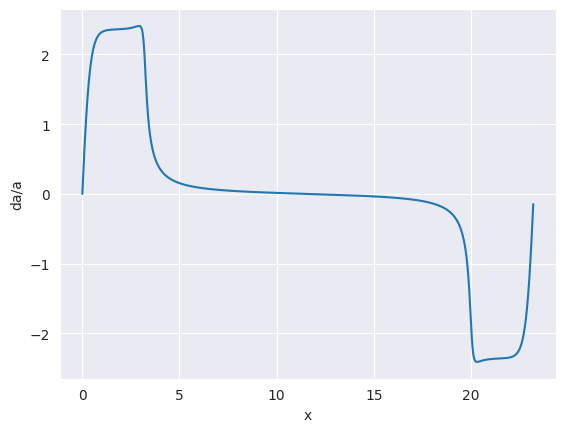

In [55]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [56]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_dbp_0.000000_dbm_0.000000_3000p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 3.42122

In [57]:
df_bIX_downside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-23.20492,0.000736,1.075760e-04,27.0268,3.542980e-06,3.542800e-06,-0.000003,-0.000003,0.146138
1,-23.20492,0.000736,1.075760e-04,27.0268,3.542980e-06,3.542800e-06,-0.000003,-0.000003,0.146138
2,-23.19832,0.000737,1.373730e-04,26.5348,4.416700e-06,4.416480e-06,-0.000003,-0.000003,0.186412
3,-23.19172,0.000738,1.671360e-04,26.1390,5.224620e-06,5.224360e-06,-0.000003,-0.000003,0.226491
4,-23.18512,0.000739,1.968670e-04,25.8076,5.962110e-06,5.961820e-06,-0.000003,-0.000003,0.266347
...,...,...,...,...,...,...,...,...,...
5997,-0.00456,0.000735,-2.068110e-05,30.3304,5.253720e-07,5.253890e-07,0.000002,0.000002,-0.028142
5998,-0.00342,0.000735,-1.550920e-05,30.9061,3.943000e-07,3.942990e-07,0.000002,0.000002,-0.021105
5999,-0.00228,0.000735,-1.033690e-05,31.7176,2.629710e-07,2.630000e-07,0.000002,0.000002,-0.014067
6000,-0.00114,0.000735,-5.164130e-06,33.1056,1.316050e-07,1.317550e-07,0.000002,0.000002,-0.007027


<Axes: xlabel='x', ylabel='da/a'>

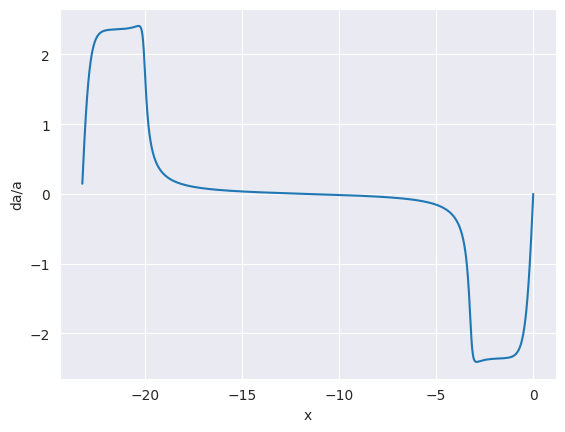

In [58]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [59]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a.reset_index(drop=True, inplace=True)
df_bIX_merged_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-23.20492,0.000736,0.000108,27.0268,0.000004,0.000004,-0.000003,-0.000003,0.146138
1,-23.20492,0.000736,0.000108,27.0268,0.000004,0.000004,-0.000003,-0.000003,0.146138
2,-23.19832,0.000737,0.000137,26.5348,0.000004,0.000004,-0.000003,-0.000003,0.186412
3,-23.19172,0.000738,0.000167,26.1390,0.000005,0.000005,-0.000003,-0.000003,0.226491
4,-23.18512,0.000739,0.000197,25.8076,0.000006,0.000006,-0.000003,-0.000003,0.266347
...,...,...,...,...,...,...,...,...,...
11999,23.18512,0.000739,-0.000197,25.8076,0.000011,0.000011,0.000006,0.000006,-0.266347
12000,23.19172,0.000738,-0.000167,26.1390,0.000010,0.000010,0.000006,0.000006,-0.226491
12001,23.19832,0.000737,-0.000137,26.5348,0.000008,0.000008,0.000006,0.000006,-0.186412
12002,23.20492,0.000736,-0.000108,27.0268,0.000007,0.000007,0.000006,0.000006,-0.146138


In [60]:
df_bIX_merged_a['dbp_squared'] = df_bIX_merged_a['dbp'] ** 2 
df_bIX_merged_a['dbm_squared'] = df_bIX_merged_a['dbm'] ** 2
df_bIX_merged_a['s_squared'] = df_bIX_merged_a['dbp_squared'] + df_bIX_merged_a['dbm_squared']
df_bIX_merged_a['s'] = df_bIX_merged_a['s_squared'].apply(lambda x: math.sqrt(x))
df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'] * 10

In [61]:
df_bIX_merged_a[(df_bIX_merged_a['x'] >= -0.01) & (df_bIX_merged_a['a'] >= 0)]

,x,a,da,phi,dbp,dbm,bp,bm,da/a,dbp_squared,dbm_squared,s_squared,s,s*1000
5993,-0.00912,0.000735,-0.000041,28.9433,1.045220e-06,1.045250e-06,0.000002,0.000002,-0.056273,1.092485e-12,1.092548e-12,2.185032e-12,1.478186e-06,0.000015
5994,-0.00798,0.000735,-0.000036,29.2105,9.160830e-07,9.161030e-07,0.000002,0.000002,-0.049243,8.392081e-13,8.392447e-13,1.678453e-12,1.295551e-06,0.000013
5995,-0.00684,0.000735,-0.000031,29.5190,7.863410e-07,7.863700e-07,0.000002,0.000002,-0.042211,6.183322e-13,6.183778e-13,1.236710e-12,1.112075e-06,0.000011
5996,-0.00570,0.000735,-0.000026,29.8839,6.560740e-07,6.561000e-07,0.000002,0.000002,-0.035177,4.304331e-13,4.304672e-13,8.609003e-13,9.278471e-07,0.000009
5997,-0.00456,0.000735,-0.000021,30.3304,5.253720e-07,5.253890e-07,0.000002,0.000002,-0.028142,2.760157e-13,2.760336e-13,5.520493e-13,7.430002e-07,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,23.18512,0.000739,-0.000197,25.8076,1.117220e-05,1.117320e-05,0.000006,0.000006,-0.266347,1.248181e-10,1.248404e-10,2.496585e-10,1.580058e-05,0.000158
12000,23.19172,0.000738,-0.000167,26.1390,9.790270e-06,9.791180e-06,0.000006,0.000006,-0.226491,9.584939e-11,9.586721e-11,1.917166e-10,1.384618e-05,0.000138
12001,23.19832,0.000737,-0.000137,26.5348,8.276330e-06,8.277110e-06,0.000006,0.000006,-0.186412,6.849764e-11,6.851055e-11,1.370082e-10,1.170505e-05,0.000117
12002,23.20492,0.000736,-0.000108,27.0268,6.639100e-06,6.639740e-06,0.000006,0.000006,-0.146138,4.407765e-11,4.408615e-11,8.816380e-11,9.389558e-06,0.000094


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

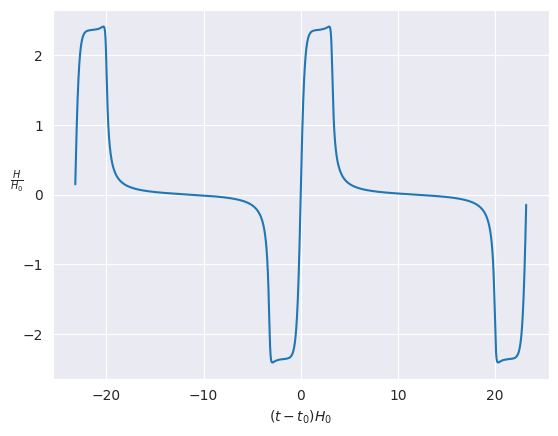

In [62]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
# sns.lineplot(df_bIX_merged_a, x='x', y='s*1000', ax=ax)

(-5.0, 5.0)

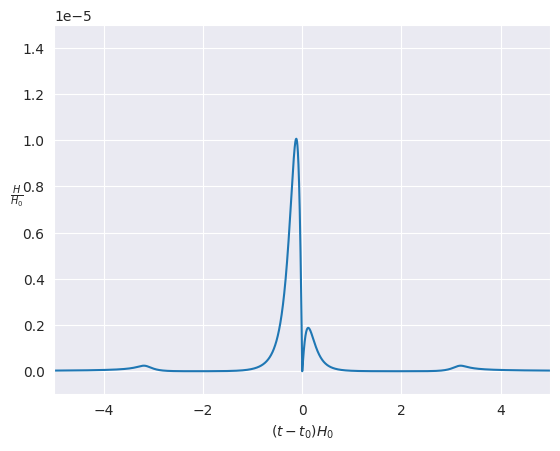

In [65]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)
plt.ylim([-0.000001, 1.5e-5])
plt.xlim([-5, 5])

## eta=18.0*1e-3, Omega_2 = 1.0e-5, dbp=dbm=1.0e-7, bp=bm=0.0

In [36]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_dbp_0.000000_dbm_0.000000_bp_0.000000_bm_0.000000_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 3.42122

In [37]:
df_bIX_upside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,0.00000,0.000735,1.741260e-09,57.5651,1.875060e-11,-7.499850e-11,-9.507650e-07,-9.507590e-07,0.000002
1,0.00342,0.000735,1.550920e-05,30.9061,1.603590e-07,1.603370e-07,-9.504910e-07,-9.504850e-07,0.021105
2,0.00684,0.000735,3.102320e-05,29.5190,3.198020e-07,3.197990e-07,-9.496690e-07,-9.496630e-07,0.042211
3,0.01027,0.000735,4.653080e-05,28.7075,4.773500e-07,4.773340e-07,-9.483050e-07,-9.482990e-07,0.063300
4,0.01369,0.000735,6.203070e-05,28.1316,6.322280e-07,6.322240e-07,-9.464060e-07,-9.464000e-07,0.084364
...,...,...,...,...,...,...,...,...,...
1996,23.12582,0.000759,-4.639570e-04,24.0427,1.359880e-05,1.359950e-05,3.644540e-06,3.644630e-06,-0.611479
1997,23.14552,0.000750,-3.748760e-04,24.4884,1.275300e-05,1.275370e-05,3.906390e-06,3.906490e-06,-0.499536
1998,23.16532,0.000744,-2.859140e-04,25.0472,1.111590e-05,1.111660e-05,4.143920e-06,4.144040e-06,-0.384338
1999,23.18512,0.000739,-1.968670e-04,25.8076,8.567160e-06,8.567760e-06,4.340180e-06,4.340310e-06,-0.266347


<Axes: xlabel='x', ylabel='da/a'>

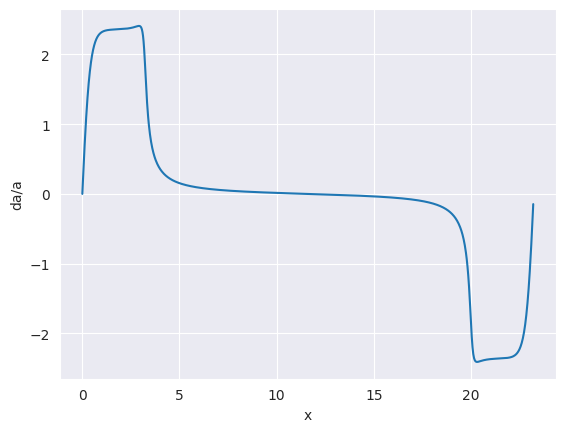

In [38]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [39]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.018000_omega_2_0.000010_dbp_0.000000_dbm_0.000000_bp_0.000000_bm_0.000000_1000p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 3.42122

In [40]:
df_bIX_downside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-23.20492,0.000736,1.075760e-04,27.0268,5.091040e-06,5.090660e-06,-4.476740e-06,-4.476600e-06,0.146138
1,-23.18512,0.000739,1.968670e-04,25.8076,8.567160e-06,8.566560e-06,-4.340180e-06,-4.340050e-06,0.266347
2,-23.16532,0.000744,2.859140e-04,25.0472,1.111590e-05,1.111520e-05,-4.143920e-06,-4.143800e-06,0.384338
3,-23.14552,0.000750,3.748760e-04,24.4884,1.275300e-05,1.275220e-05,-3.906390e-06,-3.906290e-06,0.499536
4,-23.12582,0.000759,4.639570e-04,24.0427,1.359880e-05,1.359810e-05,-3.644540e-06,-3.644450e-06,0.611479
...,...,...,...,...,...,...,...,...,...
1996,-0.01369,0.000735,-6.203070e-05,28.1316,6.322260e-07,6.322360e-07,9.464060e-07,9.464130e-07,-0.084364
1997,-0.01027,0.000735,-4.653080e-05,28.7075,4.773420e-07,4.773530e-07,9.483050e-07,9.483110e-07,-0.063300
1998,-0.00684,0.000735,-3.102320e-05,29.5190,3.198010e-07,3.198200e-07,9.496690e-07,9.496760e-07,-0.042211
1999,-0.00342,0.000735,-1.550920e-05,30.9061,1.603440e-07,1.603840e-07,9.504910e-07,9.504980e-07,-0.021105


<Axes: xlabel='x', ylabel='da/a'>

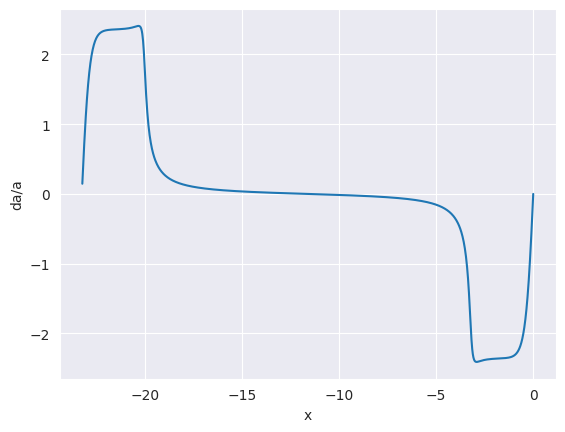

In [41]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [42]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a.reset_index(drop=True, inplace=True)
df_bIX_merged_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-23.20492,0.000736,0.000108,27.0268,0.000005,0.000005,-0.000004,-0.000004,0.146138
1,-23.18512,0.000739,0.000197,25.8076,0.000009,0.000009,-0.000004,-0.000004,0.266347
2,-23.16532,0.000744,0.000286,25.0472,0.000011,0.000011,-0.000004,-0.000004,0.384338
3,-23.14552,0.000750,0.000375,24.4884,0.000013,0.000013,-0.000004,-0.000004,0.499536
4,-23.12582,0.000759,0.000464,24.0427,0.000014,0.000014,-0.000004,-0.000004,0.611479
...,...,...,...,...,...,...,...,...,...
3997,23.12582,0.000759,-0.000464,24.0427,0.000014,0.000014,0.000004,0.000004,-0.611479
3998,23.14552,0.000750,-0.000375,24.4884,0.000013,0.000013,0.000004,0.000004,-0.499536
3999,23.16532,0.000744,-0.000286,25.0472,0.000011,0.000011,0.000004,0.000004,-0.384338
4000,23.18512,0.000739,-0.000197,25.8076,0.000009,0.000009,0.000004,0.000004,-0.266347


In [43]:
df_bIX_merged_a['dbp_squared'] = df_bIX_merged_a['dbp'] ** 2 
df_bIX_merged_a['dbm_squared'] = df_bIX_merged_a['dbm'] ** 2
df_bIX_merged_a['s_squared'] = df_bIX_merged_a['dbp_squared'] + df_bIX_merged_a['dbm_squared']
df_bIX_merged_a['s'] = df_bIX_merged_a['s_squared'].apply(lambda x: math.sqrt(x))
df_bIX_merged_a['s*1000'] = df_bIX_merged_a['s'] * 10

In [44]:
df_bIX_merged_a[(df_bIX_merged_a['x'] >= -0.01) & (df_bIX_merged_a['a'] >= 0)]

,x,a,da,phi,dbp,dbm,bp,bm,da/a,dbp_squared,dbm_squared,s_squared,s,s*1000
1998,-0.00684,0.000735,-3.102320e-05,29.5190,3.198010e-07,3.198200e-07,9.496690e-07,9.496760e-07,-0.042211,1.022727e-13,1.022848e-13,2.045575e-13,4.522803e-07,4.522803e-06
1999,-0.00342,0.000735,-1.550920e-05,30.9061,1.603440e-07,1.603840e-07,9.504910e-07,9.504980e-07,-0.021105,2.571020e-14,2.572303e-14,5.143323e-14,2.267889e-07,2.267889e-06
2000,0.00000,0.000735,-1.773260e-09,57.6559,8.413650e-13,4.541570e-11,9.507660e-07,9.507720e-07,-0.000002,7.078951e-25,2.062586e-21,2.063294e-21,4.542349e-11,4.542349e-10
2001,0.00000,0.000735,1.741260e-09,57.5651,1.875060e-11,-7.499850e-11,-9.507650e-07,-9.507590e-07,0.000002,3.515850e-22,5.624775e-21,5.976360e-21,7.730692e-11,7.730692e-10
2002,0.00342,0.000735,1.550920e-05,30.9061,1.603590e-07,1.603370e-07,-9.504910e-07,-9.504850e-07,0.021105,2.571501e-14,2.570795e-14,5.142296e-14,2.267663e-07,2.267663e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,23.12582,0.000759,-4.639570e-04,24.0427,1.359880e-05,1.359950e-05,3.644540e-06,3.644630e-06,-0.611479,1.849274e-10,1.849464e-10,3.698738e-10,1.923210e-05,1.923210e-04
3998,23.14552,0.000750,-3.748760e-04,24.4884,1.275300e-05,1.275370e-05,3.906390e-06,3.906490e-06,-0.499536,1.626390e-10,1.626569e-10,3.252959e-10,1.803596e-05,1.803596e-04
3999,23.16532,0.000744,-2.859140e-04,25.0472,1.111590e-05,1.111660e-05,4.143920e-06,4.144040e-06,-0.384338,1.235632e-10,1.235788e-10,2.471420e-10,1.572075e-05,1.572075e-04
4000,23.18512,0.000739,-1.968670e-04,25.8076,8.567160e-06,8.567760e-06,4.340180e-06,4.340310e-06,-0.266347,7.339623e-11,7.340651e-11,1.468027e-10,1.211622e-05,1.211622e-04


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

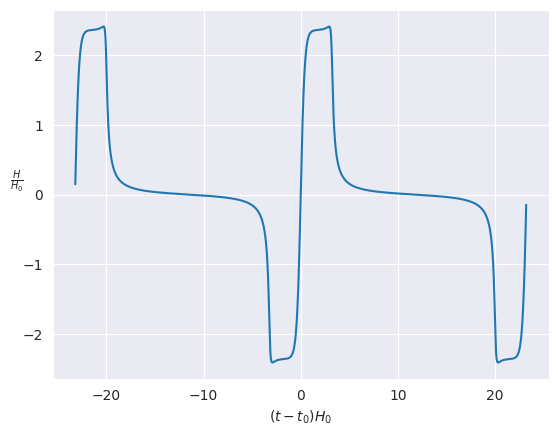

In [45]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
# sns.lineplot(df_bIX_merged_a, x='x', y='s*1000', ax=ax)

(-5.0, 5.0)

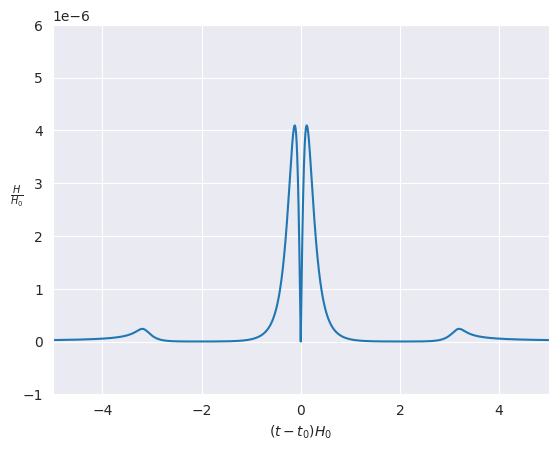

In [46]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='s', ax=ax)
plt.ylim([-0.000001, 0.6e-5])
plt.xlim([-5, 5])

# Lambda Matter

In [12]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.072000_omega_2_0.000010_omega_0_0.010000_omega_3_0.000000_omega_4_0.000000_dbp_0.000000_dbm_0.000000_bp_0.000000_bm_0.000000_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x']

In [13]:
df_bIX_upside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-6.42122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-6.41480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-6.40838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-6.40195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-6.39553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1996,19.70460,82.8915,7.85778,-13.6932,2.759970e-13,2.759970e-13,7.575980e-08,7.575980e-08,0.094796
1997,19.72430,83.0471,7.86524,-13.6988,2.744320e-13,2.744320e-13,7.575980e-08,7.575980e-08,0.094708
1998,19.74410,83.2028,7.87270,-13.7044,2.728770e-13,2.728770e-13,7.575980e-08,7.575980e-08,0.094621
1999,19.76390,83.3586,7.88016,-13.7100,2.713320e-13,2.713320e-13,7.575980e-08,7.575980e-08,0.094533


<Axes: xlabel='x', ylabel='da/a'>

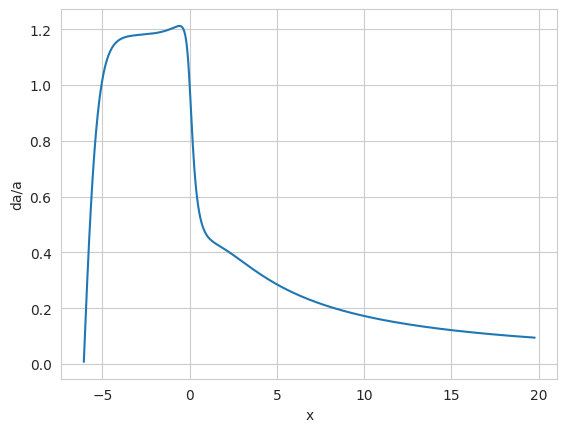

In [14]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [15]:
df_bIX_upside_a['dbp_squared'] = df_bIX_upside_a['dbp'] ** 2 
df_bIX_upside_a['dbm_squared'] = df_bIX_upside_a['dbm'] ** 2
df_bIX_upside_a['s_squared'] = df_bIX_upside_a['dbp_squared'] + df_bIX_upside_a['dbm_squared']
df_bIX_upside_a['s'] = df_bIX_upside_a['s_squared'].apply(lambda x: math.sqrt(x))
df_bIX_upside_a['s*1000'] = df_bIX_upside_a['s'] * 10

(-5.0, 20.0)

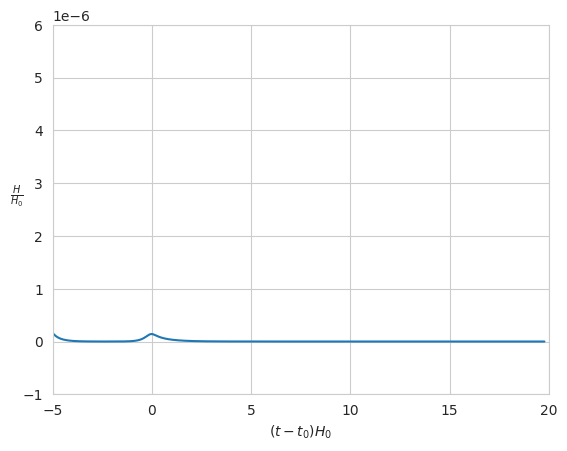

In [17]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_upside_a, x='x', y='s', ax=ax)
plt.ylim([-0.000001, 0.6e-5])
plt.xlim([-5, 20])

# Matter

In [18]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_eta_0.072000_omega_2_0.000010_omega_0_0.010000_omega_3_0.001000_omega_4_0.001000_dbp_0.000000_dbm_0.000000_bp_0.000000_bm_0.000000_1000p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 'dbp', 'dbm', 'bp', 'bm']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x']

In [19]:
df_bIX_upside_a

,x,a,da,phi,dbp,dbm,bp,bm,da/a
0,-6.42122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-6.41480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-6.40838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-6.40195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-6.39553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1996,19.70460,82.8508,7.85583,-13.6927,2.761840e-13,2.761840e-13,7.587120e-08,7.587120e-08,0.094819
1997,19.72430,83.0063,7.86329,-13.6983,2.746170e-13,2.746170e-13,7.587120e-08,7.587120e-08,0.094731
1998,19.74410,83.1619,7.87075,-13.7040,2.730610e-13,2.730610e-13,7.587120e-08,7.587120e-08,0.094644
1999,19.76390,83.3177,7.87820,-13.7096,2.715150e-13,2.715150e-13,7.587120e-08,7.587120e-08,0.094556


<Axes: xlabel='x', ylabel='da/a'>

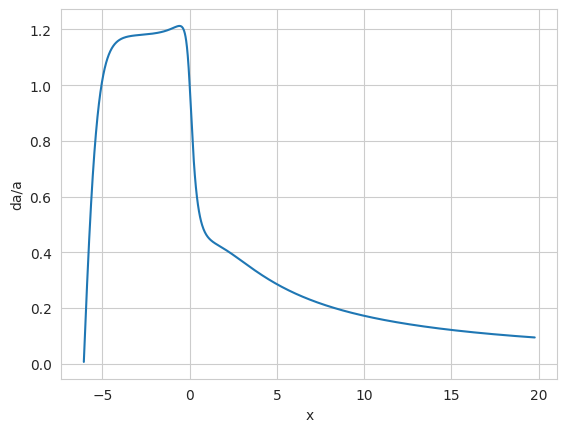

In [20]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [21]:
df_bIX_upside_a['dbp_squared'] = df_bIX_upside_a['dbp'] ** 2 
df_bIX_upside_a['dbm_squared'] = df_bIX_upside_a['dbm'] ** 2
df_bIX_upside_a['s_squared'] = df_bIX_upside_a['dbp_squared'] + df_bIX_upside_a['dbm_squared']
df_bIX_upside_a['s'] = df_bIX_upside_a['s_squared'].apply(lambda x: math.sqrt(x))
df_bIX_upside_a['s*1000'] = df_bIX_upside_a['s'] * 10

(-5.0, 20.0)

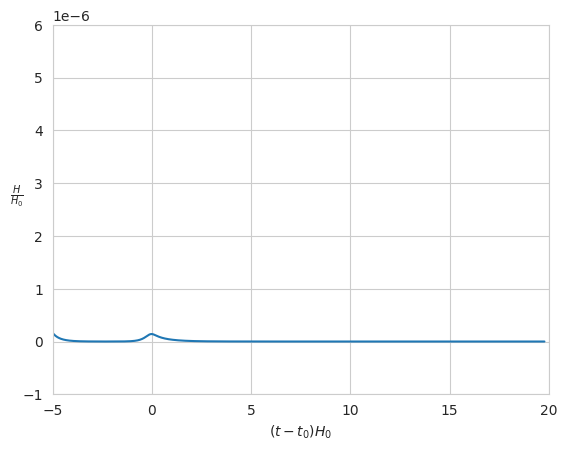

In [22]:
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_upside_a, x='x', y='s', ax=ax)
plt.ylim([-0.000001, 0.6e-5])
plt.xlim([-5, 20])